In [13]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.datasets import load_iris
data = load_iris()
features = data.data
cls = data.target

# PART 1 - Principal Component Analysis.

In [7]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
set(cls)

{0, 1, 2}

Applying PCA projection of the features of IRIS dataset in 2 dimensions.

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(features)
X = pca.transform(features)

In [32]:
X[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

<AxesSubplot:>

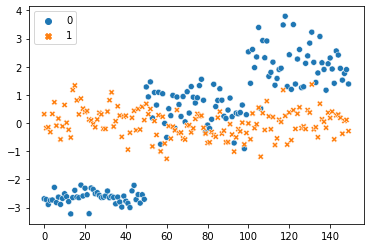

In [33]:
sns.scatterplot(data=X)

Variance Ratio explained by PCA with 2-dimensions is 97.76%.

In [38]:
print("Variance Explained:", pca.explained_variance_ratio_)
print("Cumulative Variance Ratio:", pca.explained_variance_ratio_.cumsum())

Variance Explained: [0.92461872 0.05306648]
Cumulative Variance Ratio: [0.92461872 0.97768521]


# PART 2 - Another Reduction Method

## Method chosen - Singular Value Decomposition

### What is Singular Value Decomposition?
Singlar Value Decomposition or SVD is a generally used linear algebra data processing technique. It is the first step in many data science and machine learning techniques. It is used to distill the many dimensions of data into the ones that have most correlation. 

SVD is a data driven generalization of the fourier transform. It decomposes a matrix 𝐀 according to, 𝐀=𝐔𝐒𝐕', where V' is the Transpose of V.

SVD is used in Google's Page Rank Algorithm to order the search results, Facebook's person differentiation using facial recognition in photos, Netflix & Amazon's recommender systems, etc. It is also the basis for Principal Component Analysis(PCA), which is the most widely used dimensionality reduction technique.

In [39]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
svd.fit(features)
Y = svd.transform(features)

In [40]:
Y[:5]

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018]])

<AxesSubplot:>

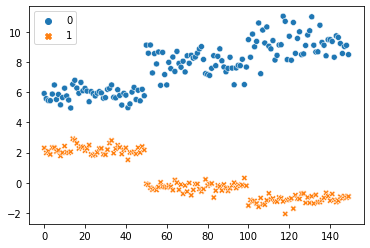

In [41]:
sns.scatterplot(data=Y)

Variance Ratio explained by Singular Va;ue Decomposition with 2-dimensions is 97.72%.

In [42]:
print("Variance Ratio: ", svd.explained_variance_ratio_)
print("Cumulative Variance Ratio:", svd.explained_variance_ratio_.cumsum())

Variance Ratio:  [0.52875361 0.44845576]
Cumulative Variance Ratio: [0.52875361 0.97720937]


# PART 3 - Conceptual Questions

### 1
The two methods I used for dimensionality reduction are Principal Component Analysis(PCA) and Singular Value Decomposition(SVD). The variance explained by PCA and SVD is 97.76% and 97.72% respectively. As both of them belong to Linear Algebra Methods, the variance is pretty similar. PCA out does SVD by 0.04% for this dataset, which is not a lot.

### 2
From the scatter plot, although Singular Value Decomposition(SVD) has a lot of breaks in data, we can see that it seperated the values really well. There is no overlap. And PCA has some overlap between the two classes of data.

### 3
In this case, both the methods performed really well. So, any one of the two can be used for the dimensionality reduction step in our data preprocessing stage for this dataset. But there will be instances where one method comprehensively outperforms the other.
##### What is the Primary difference between PCA and SVD?
The most importat difference between PCA and SVD is, PCA is used for datasets with dense data and SVD is used for datasets with sparse data. But in theory, PCA uses SVD to calculate and rank the importance of features/dimensions(this is also the reason why they have similar variance ratios). But this is computationally heavy.